In [1]:
library(ggpubr)
library(MASS)
library(tidyverse)

Warning message:
"package 'ggpubr' was built under R version 3.6.3"Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: magrittr
Warning message:
"package 'magrittr' was built under R version 3.6.3"Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  3.1.1     v purrr   0.3.2
v tidyr   0.8.3     v dplyr   1.0.6
v readr   1.3.1     v stringr 1.4.0
v tibble  3.1.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::extract()   masks magrittr::extract()
x dplyr::filter()    masks stats::filter()
x dplyr::lag()       masks stat

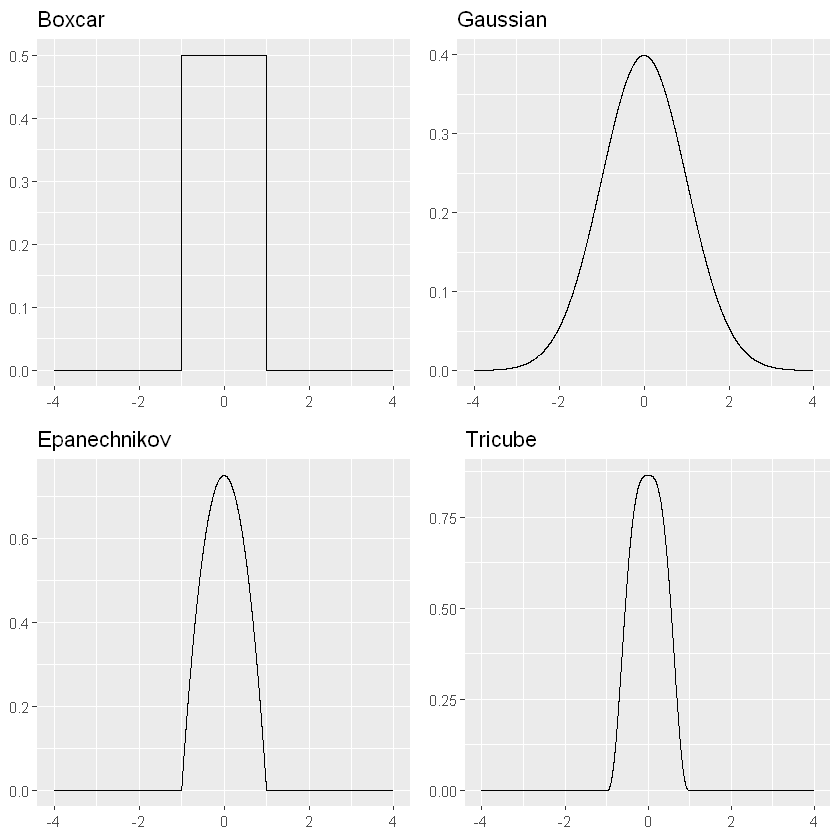

In [2]:
# Use ggarrnage to create the boxcar kernel, the Gaussian kernel, the Epanechnikov kernel, the tricube kernel
q1 <- runif(10000, -4, 4)
plot_1 <- 
  tibble(x = q1, y = 0.5*(abs(q1) <= 1)) %>% 
  ggplot(aes(x = x, y = y)) + 
  geom_line() +
  labs(title = "Boxcar") +
  theme(axis.title= element_blank())

plot_2 <- 
  tibble(x = q1, y = (1/sqrt(2*pi))*exp((-q1^2)/2)) %>% 
  ggplot(aes(x = x, y = y)) + 
  geom_line() +
  labs(title = "Gaussian") +
  theme(axis.title= element_blank())
 
plot_3 <- 
  tibble(x = q1, y = (3/4)*(1-q1^2)*(abs(q1) <= 1)) %>% 
  ggplot(aes(x = x, y = y)) + 
  geom_line() +
  labs(title = "Epanechnikov") +
  theme(axis.title= element_blank())

plot_4 <- 
  tibble(x = q1, y = (70/81)*((1-abs(q1)^3)^3)*(abs(q1) <= 1)) %>% 
  ggplot(aes(x = x, y = y)) + 
  geom_line() +
  labs(title = "Tricube") +
  theme(axis.title= element_blank())

ggarrange(plot_1, plot_2, plot_3, plot_4)

In [3]:
# Write a function called neg_log_like_Gamma with inputs theta and x that returns the value of the
# negative of the log-likelihood function evaluated at Θ = (α, β) given the data x.
# Setting
set.seed(1)
alpha <- 1.5
beta <- 2
n <- 10000

# Simulation
x <-rgamma(n, alpha ,beta)

## The negative of the log likelihood function
neg_log_like_Gamma <- function(theta, x){
 alpha <- theta[1]
 beta <-theta[2]
 n <- length(x)
 log_like_Gamma <- n*alpha*log(beta)-n*log(gamma(alpha))+(alpha-1)*sum(log(x))-beta*sum(x)
 -log_like_Gamma
}

In [4]:
# Find the MLE of alpha and beta using optim,
# Optimization
(est<- optim(par = runif(2, 0, 1), f= neg_log_like_Gamma, x = x, method = "L-BFGS-B")$par)

[1] 1.522732 2.012783

In [5]:
# Write a function called neg_log_like_Pois with inputs beta, X and y that returns the value of the
# negative of the log-likelihood function evaluated at beta given the data X and y.
# Setting
set.seed(1)
beta <-c(0.3, 0.5, -0.5)
n <- 10000
p <-length(beta)-1

# Simulation
X <-cbind(1,matrix(runif(n*p), nrow = n, ncol = p))
y <-rpois(n,exp(X%*%beta))

## The negative of the log likelihood function
neg_log_like_Pois <- function(beta, X, y){
  beta_X <- beta[1] + beta[2]*X[,2] + beta[3]*X[,3]
  log_like_Pois <- sum(-exp(beta_X)+(beta_X)*y)
  -log_like_Pois
}

# Find the MLE of β using optim, the function in Q3(a), and the simulated data at the beginning of
# this question.
# Optimization
(beta_est <- optim(par = runif(3, 0, 1), f = neg_log_like_Pois, y = y, X = X, method = "BFGS")$par)

[1]  0.2760096  0.5510931 -0.5262571

In [6]:
# Write a function called dedf (density of empirical distribution function) to compute the empirical
# distribution function of the observation data at x. The inputs are x (a vector of length 1) and data (a vector
# of arbitrary length).
dedf <- function(x, data){
  n <- length(data)
  no_element_satisfied <- sum(data <= x)
  density <- no_element_satisfied/n
  density
}

In [7]:
# Write a function called ks_ts to compute the test statistic D := supx|Fn(x) − Gm(x)|
ks_ts <-function(x, y){
  u <- c(x, y)
  D <- rep(0, length(u))
  for (i in 1:length(u)){
    D[i] <- abs(dedf(u[i], x) - dedf(u[i], y))
  }
  max(D)
}

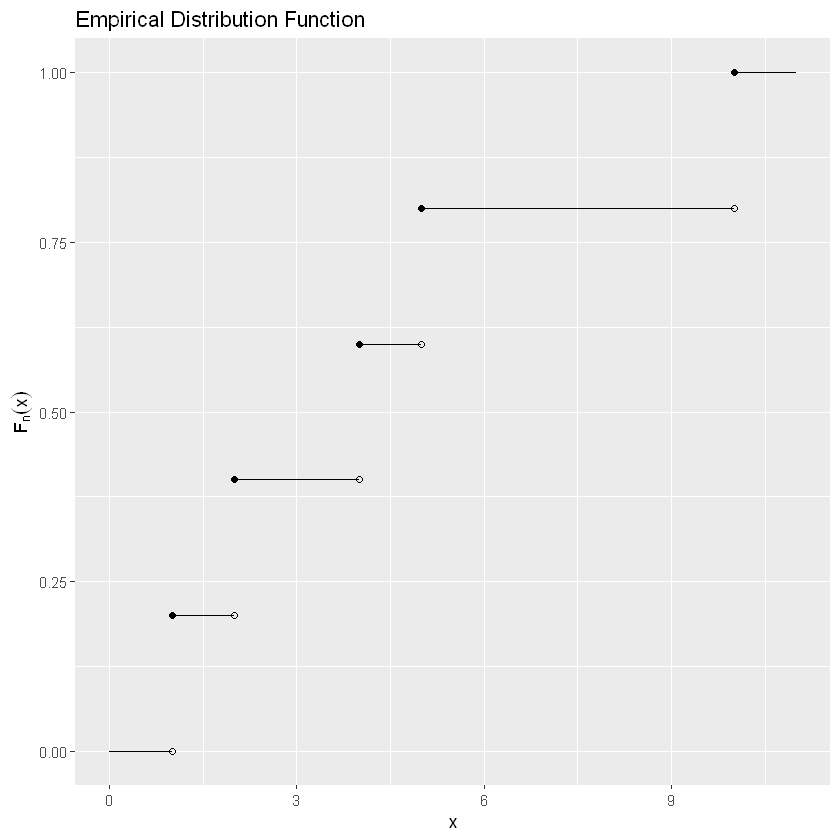

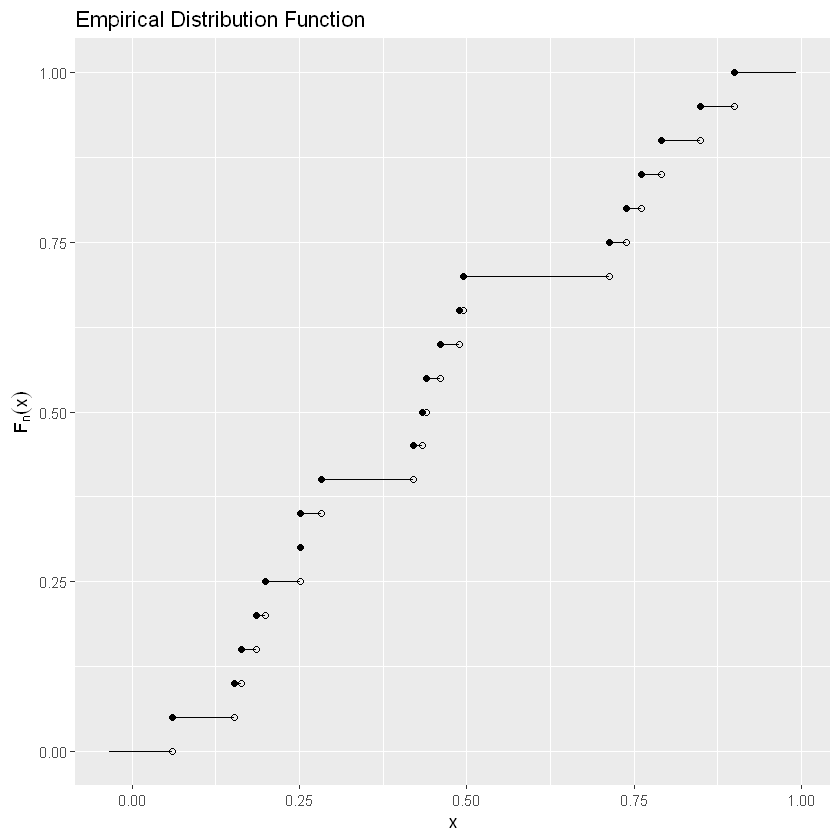

In [10]:
# write a function called plot_edf to create the Empirical Distribution Function plots.
plot_edf <- function(data){
  x <- sort(data)
  y <- c(0, rep(0, length(x)))
  for (i in 1:length(x)){
    y[i+1] <- dedf(x[i], x)
  }
  xstart <- c(min(x)-x[2]+x[1], x)
  xend <- c(x, max(x)+x[2]-x[1])
  plot <- 
    ggplot() +
    geom_segment(aes(x = xstart, y = y, xend = xend, yend = y)) +
    geom_point(aes(x = x, y = y[y > min(y)])) +
    geom_point(aes(x = x, y = y[y < max(y)]), shape = 1) +
    labs(x = 'x', y = expression(F[n](x)), title = "Empirical Distribution Function")
  plot
}

plot_edf(data = c(1, 5, 10, 2, 4))

set.seed(362)
x <- runif(20, 0, 1)
plot_edf(data = x)

In [11]:
# The specifications for a certain kind of ribbon call for a mean breaking strength of 185 pounds. If five
# pieces randomly selected from different rolls have breaking strengths of 171.6, 191.8, 178.3, 184.9, and 189.1
# pounds, test the null hypothesis μ = 185 pounds against the alternative hypothesis μ < 185 pounds at the
# 0.05 level of significance.
q7 <- c(171.6, 191.8, 178.3, 184.9, 189.1)
t.test(q7, mu = 185, alternative = "less")


	One Sample t-test

data:  q7
t = -0.50603, df = 4, p-value = 0.3197
alternative hypothesis: true mean is less than 185
95 percent confidence interval:
    -Inf 190.976
sample estimates:
mean of x 
   183.14 


In [12]:
# To study the durability of a new paint for white center lines, a highway department painted test
# strips across heavily traveled roads in eight different locations, and electronic counters showed that they
# deteriorated after having been crossed by (to the nearest hundred) 142,600, 167,800, 136,500, 108,300,
# 126,400, 133,700, 162,000, and 149,400 cars. Construct a 95% confidence interval for the average amount of
# traffic (car crossings) that this paint can withstand before it deteriorates.
q8 <- c(142600, 167800, 136500, 108300, 126400, 133700, 162000, 149400)
t.test(q8, conf.level = 0.95)$conf.int

[1] 124762.1 156912.9
attr(,"conf.level")
[1] 0.95

In [13]:
# In a random sample, 35 of 400 persons given a flu vaccine experienced some discomfort. Construct a 95
# confidence interval for the true proportion of persons who will experience some discomfort from the vaccine.
no_discomfort <- 35
prop.test(no_discomfort, 400, p = no_discomfort/400 )$conf.int

[1] 0.06358691 0.11926073
attr(,"conf.level")
[1] 0.95

In [15]:
# Determine, on the basis of the sample data shown in the following table, whether the true proportion
# of shoppers favoring detergent A over detergent B is the same in all three cities:
#           number favoring detergent A             number favoring detergent B
# City C             232                                 168
# City D             260                                 240
# City E             197                                 203
no_A <- c(232, 260, 197)
no_sample <-c(232+168, 260+240, 197+203)
prop.test(no_A, no_sample)


	3-sample test for equality of proportions without continuity
	correction

data:  no_A out of no_sample
X-squared = 6.4733, df = 2, p-value = 0.0393
alternative hypothesis: two.sided
sample estimates:
prop 1 prop 2 prop 3 
0.5800 0.5200 0.4925 
